## PROYECTO 10 - Aprendizaje Supervisado 

#### Carga de datos e importación de librerías

In [1]:
pip install seaborn

In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, precision_score


In [ ]:
df = pd.read_csv(r"C:\Users\Usuario\Desktop\CARPETAS\TRIPLETEN\PROYECTO10\Churn.csv")

#### Analisis del DataFrame

In [8]:
df.head()

In [9]:
df.info()

In [10]:
#Eliminamos columnas innecesarias para el modelo
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

#Rellenamos los valores faltantes de "Tenure"
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean())

In [11]:
#Comprobamos los cambios 
df.info()

**Comentarios:**

Se cargaron los datos y se eliminaron las columnas irrelevantes para el modelo así como tambien se rellenó la columna "Tenure" con la media de los datos ya que teniamos datos faltantes en esa columna. 

#### Preprocesamiento de datos

In [12]:
df["Geography"].unique()

In [13]:
#Codificamos las variables categóricas
df_ohe = pd.get_dummies(df, columns=["Geography", "Gender"] ,drop_first= True) 
print(df_ohe.columns)
print(df_ohe[["Geography_Germany","Geography_Spain","Gender_Male"]])

**Comentarios:**

En este paso tenemos definido ya la clase Geography (país) como True o False dependiendo si la persona es de alguno de los 3 países que vemos en el df (España, Francia y Alemania); así como tambien tenemos la categoría Gender como True o False para la nueva columna Gender_Male. 

#### Separamos las características y el objetivo 

In [14]:
features = df_ohe.drop("Exited", axis=1)
target = df_ohe["Exited"]

#### Dividimos el conjunto de entrenamiento y validación 

In [15]:
#Dividimos en conjuntos de entrenamiento y validación

# Primera división: separamos el 20% como conjunto de prueba
features_temp, features_test, target_temp, target_test = train_test_split(features, target, test_size=0.20, random_state=12345)

# Segunda división: ahora dividimos el 80% restante en entrenamiento y validación (60%-20%)
features_train, features_valid, target_train, target_valid = train_test_split(features_temp, target_temp, test_size=0.25, random_state=12345)# 0.25 * 0.80 = 0.20

In [16]:
print(features_train.shape) #60% del Dataframe
print(features_valid.shape) #20% del DataFrame
print(features_test.shape) #20% del DataFrame

#### Escalamos los datos númericos 

In [17]:
numeric = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]
scaler = StandardScaler()

scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

#### Equilibrio de clases

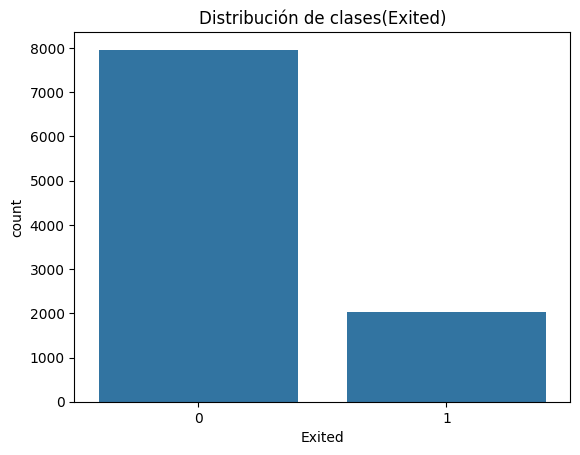

In [18]:
#Distribución de clases 
print(target.value_counts(normalize=True))
sns.countplot(x=target)
plt.title("Distribución de clases(Exited)")
plt.show()

#### Entrenamos diferentes modelos sin corregir el desequilibrio de clases

##### Logistic Regression

In [36]:
model = LogisticRegression(random_state=12345, solver= 'liblinear')
model.fit(features_train,target_train)
target_predict = model.predict(features_valid)
target_probability = model.predict_proba(features_valid)[:,1]
    
f1 = f1_score(target_valid,target_predict)
roc = roc_auc_score(target_valid,target_probability)
    
print(f"F1 Score:{f1:.3f}")
print(f"AUC-ROC:{roc:.3f}")

##### Decision Tree (con 10 diferentes profundidades)

In [43]:
best_f1_decisiontree= 0
best_roc_decisiontree= 0
best_depth1_decisiontree= 0
best_depth2_decisiontree= 0

for depth in range (1,11):
    model= DecisionTreeClassifier(random_state=12345, max_depth= depth)
    model.fit(features_train,target_train)
    target_predict = model.predict(features_valid)
    target_probability = model.predict_proba(features_valid)[:,1]
    
    f1 = f1_score(target_valid,target_predict)
    roc = roc_auc_score(target_valid,target_probability)
    print("Max_depth",depth,": f1_score=",f1," AUC-ROC=",roc)
    
    if f1 > best_f1_decisiontree:
        best_f1_decisiontree = f1 
        best_depth1_decisiontree = depth
    
    elif roc > best_roc_decisiontree:
        best_roc_decisiontree = roc
        best_depth2_decisiontree = depth 
        
print()
print("El mejor resultado f1 fue:",best_f1_decisiontree,"usando depth=",best_depth1_decisiontree)
print("El mejor resultado AUC-ROC fue:",best_roc_decisiontree,"usando depth=",best_depth2_decisiontree)

##### Random Forest (rango de 10 estimators)

In [44]:
best_f1_randomforest= 0
best_roc_randomforest= 0
best_est1_randomforest= 0
best_est2_randomforest= 0

for est in range (1,11):
    model= RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train,target_train)
    target_predict = model.predict(features_valid)
    target_probability = model.predict_proba(features_valid)[:,1]
    
    f1 = f1_score(target_valid,target_predict)
    roc = roc_auc_score(target_valid,target_probability)
    print("Max_est",est,": f1_score=",f1," AUC-ROC=",roc)
    
    if f1 > best_f1_randomforest:
        best_f1_randomforest = f1 
        best_est1_randomforest = est
    
    elif roc > best_roc_randomforest:
        best_roc_randomforest = roc
        best_est2_randomforest = est 
        
print()
print("El mejor resultado f1 fue:",best_f1_randomforest,"usando n_est=",best_est1_randomforest)
print("El mejor resultado AUC-ROC fue:",best_roc_randomforest,"usando n_est=",best_est2_randomforest)

**Comentarios:**

Se entrenaron diferentes modelos con variaiciones en sus hiperparámetros sin corregir el desequilibrio de clases. Se obtuvo su valor F1 y AUC-ROC de cada modelo y podemos observar que hasta el momento los modelos que mayor f1 score obtubieron fue:
- DecisionTree (depth 7): f1= 0.5583 
- Random Forest (n_est= 5): f1= 0.5582

En cuanto a lso mejores resultados AUC-ROC encontramos:
- DecisionTree (depth 6): AUC-ROC= 0.8136
- RandomForest (n_est= 10): AUC-ROC= 0.8111

A continuación usaremos la técnica de sobremuestreo y submuestreo para equilibrar las clases y veremos cual es nuestro máximo resultado F1 y AUC-ROC.

#### Mejoraremos la calidad del modelo corrigiendo el desequilibrio

##### Sobremuestreo

In [39]:
#Dividimos el dataset de entrenamiento en observaciones positivas y negativas
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)


In [40]:
#Duplicamos varias veces las observaciones positivas y combinamos con las observaciones de clase negatvivas
repeat = 10
features_upsampled = pd.concat([features_zeros]+[features_ones]*repeat)
target_upsampled = pd.concat([target_zeros]+[target_ones]*repeat)

print(features_upsampled.shape)
print(target_upsampled.shape)

In [41]:
#Logistic Regression 
model_upsampled = LogisticRegression(random_state=12345, solver= 'liblinear')
model_upsampled.fit(features_upsampled,target_upsampled)
target_predict_upsampled = model_upsampled.predict(features_valid)
target_probability_upsampled = model_upsampled.predict_proba(features_valid)[:,1]
    
f1_upsampled = f1_score(target_valid,target_predict_upsampled)
roc_upsampled = roc_auc_score(target_valid,target_probability_upsampled)
    
print(f"F1 Score:{f1_upsampled:.3f}")
print(f"AUC-ROC:{roc_upsampled:.3f}")

In [42]:
#DecisionTree
best_f1_upsampled= 0
best_roc_upsampled= 0
best_depth1_upsampled= 0
best_depth2_upsampled= 0

for depth in range (1,11):
    model= DecisionTreeClassifier(random_state=12345, max_depth= depth)
    model.fit(features_upsampled,target_upsampled)
    target_predict = model.predict(features_valid)
    target_probability = model.predict_proba(features_valid)[:,1]
    
    f1 = f1_score(target_valid,target_predict)
    roc = roc_auc_score(target_valid,target_probability)
    print("Max_depth",depth,": f1_score=",f1," AUC-ROC=",roc)
    
    if f1 > best_f1_upsampled:
        best_f1_upsampled = f1 
        best_depth1_upsampled = depth
    
    elif roc > best_roc_upsampled:
        best_roc_upsampled = roc
        best_depth2_upsampled= depth 
        
print()
print("El mejor resultado f1 fue:",best_f1_upsampled,"usando depth=",best_depth1_upsampled)
print("El mejor resultado AUC-ROC fue:",best_roc_upsampled,"usando depth=",best_depth2_upsampled)

In [48]:
#RandomForest
best_f1_randomforest_ups= 0
best_roc_randomforest_ups= 0
best_est1_randomforest_ups= 0
best_est2_randomforest_ups= 0

for est in range (1,11):
    model= RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_upsampled,target_upsampled)
    target_predict = model.predict(features_valid)
    target_probability = model.predict_proba(features_valid)[:,1]
    
    f1 = f1_score(target_valid,target_predict)
    roc = roc_auc_score(target_valid,target_probability)
    print("Max_est",est,": f1_score=",f1," AUC-ROC=",roc)
    
    if f1 > best_f1_randomforest_ups:
        best_f1_randomforest_ups = f1 
        best_est1_randomforest_ups = est
    
    elif roc > best_roc_randomforest_ups:
        best_roc_randomforest_ups = roc
        best_est2_randomforest_ups = est 
        
print()
print("El mejor resultado f1 fue:",best_f1_randomforest_ups,"usando n_est=",best_est1_randomforest_ups)
print("El mejor resultado AUC-ROC fue:",best_roc_randomforest_ups,"usando n_est=",best_est2_randomforest_ups)

**Comentarios:**

Vemos como con la técnica de sobremuestreo logramos mejorar los resultados F1 Score para LogisticRegresion (de 0.301 a 0.405) y de RandomForest (de 0.5582 a 0.5751 aunque para lograr esta mejora deberemos cambiar el hiperparametro depth de 7 a 5). En el caso de DecisionTree unicamente disminuyó el valor F1 máximo a lograr (de 0.558 bajó a 0.486).
Para los resultados AUC-ROC logramos mejorar los 3 resultados; LogisticRegresion (de 0.770 a 0.773), DecisionTree (de 0.813 a 0.826 con el mismo hiperparametro de depth 6) y RandomForest (de 0.811 a 0.828)

##### Submuestreo

In [49]:
features_downsampled = pd.concat([features_zeros.sample(frac = 0.1, random_state= 12345)]+[features_ones])
target_downsampled = pd.concat([target_zeros.sample(frac = 0.1, random_state= 12345)]+[target_ones])

In [50]:
#LogisticRegresion
model_downsampled = LogisticRegression(random_state=12345, solver= 'liblinear')
model_downsampled.fit(features_downsampled,target_downsampled)
target_predict_downsampled = model_downsampled.predict(features_valid)
target_probability_downsampled = model_downsampled.predict_proba(features_valid)[:,1]
    
f1_downsampled = f1_score(target_valid,target_predict_downsampled)
roc_downsampled = roc_auc_score(target_valid,target_probability_downsampled)
    
print(f"F1 Score:{f1_downsampled:.3f}")
print(f"AUC-ROC:{roc_downsampled:.3f}")

In [51]:
#DecisionTree
best_f1_dtree_downsampled= 0
best_roc_dtree_downsampled= 0
best_depth1_dtree_downsampled= 0
best_depth2_dtree_downsampled= 0

for depth in range (1,11):
    model= DecisionTreeClassifier(random_state=12345, max_depth= depth)
    model.fit(features_downsampled,target_downsampled)
    target_predict = model.predict(features_valid)
    target_probability = model.predict_proba(features_valid)[:,1]
    
    f1 = f1_score(target_valid,target_predict)
    roc = roc_auc_score(target_valid,target_probability)
    print("Max_depth",depth,": f1_score=",f1," AUC-ROC=",roc)
    
    if f1 > best_f1_dtree_downsampled:
        best_f1_dtree_downsampled = f1 
        best_depth1_dtree_downsampled = depth
    
    elif roc > best_roc_dtree_downsampled:
        best_roc_dtree_downsampled = roc
        best_depth2_dtree_downsampled= depth 
        
print()
print("El mejor resultado f1 fue:",best_f1_dtree_downsampled,"usando depth=",best_depth1_dtree_downsampled)
print("El mejor resultado AUC-ROC fue:",best_roc_dtree_downsampled,"usando depth=",best_depth2_dtree_downsampled)

In [52]:
#RandomForest
best_f1_randomforest_dws= 0
best_roc_randomforest_dws= 0
best_est1_randomforest_dws= 0
best_est2_randomforest_dws= 0

for est in range (1,11):
    model= RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_downsampled,target_downsampled)
    target_predict = model.predict(features_valid)
    target_probability = model.predict_proba(features_valid)[:,1]
    
    f1 = f1_score(target_valid,target_predict)
    roc = roc_auc_score(target_valid,target_probability)
    print("Max_est",est,": f1_score=",f1," AUC-ROC=",roc)
    
    if f1 > best_f1_randomforest_dws:
        best_f1_randomforest_dws = f1 
        best_est1_randomforest_dws = est
    
    elif roc > best_roc_randomforest_dws:
        best_roc_randomforest_dws = roc
        best_est2_randomforest_dws = est 
        
print()
print("El mejor resultado f1 fue:",best_f1_randomforest_dws,"usando n_est=",best_est1_randomforest_dws)
print("El mejor resultado AUC-ROC fue:",best_roc_randomforest_dws,"usando n_est=",best_est2_randomforest_dws)

**Comentarios:**

El submuestreo nos ayudó a mejorar el resultado F1 y AUC-ROC únicamente en LogisticRegresion (f1 de 0.301 a 0.407 y AUC-ROC de 0.770 a 0.773), tanto DecisionTree como RandomForest bajó sus resultados F1 y AUC-ROC máximos. 

**Observaciones:**

¿Como sabemos que estás técnicas funcionaron?
- Observamos y comparamos como cambia el F1 Score, que considera tanto precisión como recall, cuanto más alto, mejor. 
- Revisamos el AUC-ROC, que mide qué tan bien el modelo distingue entre las dos clases

Ahora realizaremos la prueba final utilizando features_test y target_test. Elegiremos el modelo Random Forest con la calibración de Sobremuestreo ya que fue la que mejores resultados F1 y AUC-ROC nos dieron en comparación con los demás modelos.

#### Prueba final 

In [61]:
#RandomForest
best_f1_finaltest= 0
best_roc_finaltest= 0
best_est1_finaltest= 0
best_est2_finaltest= 0

for est in range (1,21):
    model= RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_upsampled,target_upsampled)
    target_predict = model.predict(features_test)
    target_probability = model.predict_proba(features_test)[:,1]
    
    f1 = f1_score(target_test,target_predict)
    roc = roc_auc_score(target_test,target_probability)
    print("Max_est",est,": f1_score=",f1," AUC-ROC=",roc)
    
    if f1 > best_f1_finaltest:
        best_f1_finaltest = f1 
        best_est1_finaltest = est
    
    elif roc > best_roc_finaltest:
        best_roc_finaltest = roc
        best_est2_finaltest = est 
        
print()
print("El mejor resultado f1 fue:",best_f1_finaltest,"usando n_est=",best_est1_finaltest)
print("El mejor resultado AUC-ROC fue:",best_roc_finaltest,"usando n_est=",best_est2_finaltest)

### Conclusiones 

Una vez hecha la prueba final podemos observar que Random Forest con el hiper parámetro de 17 n_estimators y balanceando con el sobremuestreo nos da el mejor resultado F1 a obtener, dandonos un resultado de 0.6072 y un AUC-ROC de 0.8341. 